In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

Q1. What is the range of selling prices in the dataset ?


In [8]:
max = df['selling_price'].max()
min = df['selling_price'].min()

print("range_selling_price: ", (min, max))

range_selling_price:  (5000, 760000)


Q2.What is the median selling price for bikes in the dataset?


In [9]:
median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

Q3. What is the most common seller type?

In [10]:
df['seller_type'].mode()

0    Individual
Name: seller_type, dtype: object

Q4. How many bikes have driven more than 50,000 kilometers?

In [18]:
df[df['km_driven'] > 50000]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
15,Suzuki Access 125 [2007-2016],25000,2012,Individual,1st owner,55000,58314.0
20,Hero Passion Pro 110,15000,2008,Individual,1st owner,60000,NaN
31,Yamaha FZ S [2012-2016],38000,2013,Individual,1st owner,75000,79432.0
43,Hero Passion XPro,28000,2012,Individual,1st owner,81000,56750.0
...,...,...,...,...,...,...,...
1049,Hero Super Splendor,20000,2007,Individual,1st owner,55000,57000.0
1050,Bajaj Pulsar 150,20000,2010,Individual,1st owner,60000,75000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q5. What is the average km_driven value for each ownership type ?


In [19]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [20]:
df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

Q6. What proportion of bikes are from the year 2015 or older ?

In [21]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [26]:
(df['year']<=2015).mean()

0.5664467483506126

Q7. What is the trend of missing values across the dataset ?


In [30]:
missing_values = df.isnull().sum()
missing_values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [31]:
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64

Q8. What is the highest ex_showroom_price recorded, and for which bike ?

In [32]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [33]:
df['ex_showroom_price'].max()

1278000.0

Q9. What is the total number of bikes listed by each seller type ?

In [34]:
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

Q10. What is the relationship between selling_price and km_driven for first-owner bikes ?


In [35]:
df['owner']

0       1st owner
1       1st owner
2       1st owner
3       1st owner
4       2nd owner
          ...    
1056    1st owner
1057    1st owner
1058    2nd owner
1059    1st owner
1060    1st owner
Name: owner, Length: 1061, dtype: object

In [59]:
df2 = df[df['owner'] == '1st owner']

In [62]:
df2 = df2[['selling_price', 'owner']]

In [63]:
df2['selling_price'].mean()

60022.81385281385

In [64]:
# Insight >> Mean of selling price of bike which are selled by 1st owner is 60022.81385281385

Q11. Identify and remove outliers in the km_driven column using the IQR method ?


In [67]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bike_data_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
bike_data_no_outliers


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [69]:
print("Removed Outliers in km_driven: ", len(df) - len(bike_data_no_outliers))

Removed Outliers in km_driven:  39


Q12.  Perform a bivariate analysis to visualize the relationship between year and selling_price ?


In [70]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

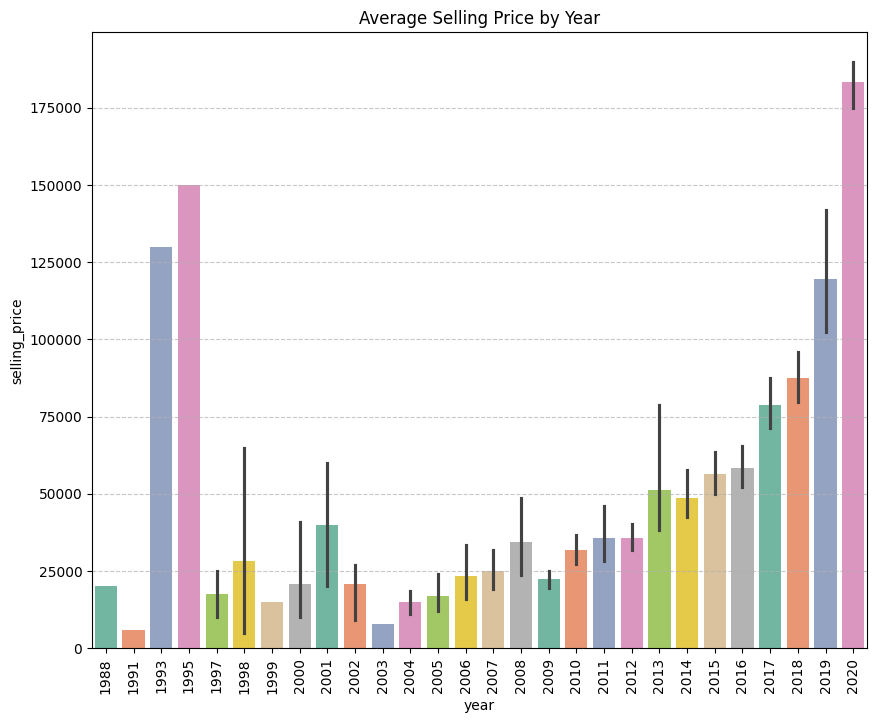

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y='selling_price', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Average Selling Price by Year')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [88]:
df['ex_showroom_price'].isnull().sum()

435

In [89]:
# without a null value
valid_bikes = df.dropna(subset=['ex_showroom_price']).copy()

In [100]:
from datetime import datetime
current_year = datetime.now().year

valid_bikes['bike_age'] = current_year - valid_bikes['year']

# Avoid division by zero
valid_bikes = valid_bikes[valid_bikes["bike_age"] > 0]

valid_bikes['depreciation_per_year'] = (valid_bikes['ex_showroom_price'] - valid_bikes['selling_price']) / valid_bikes['bike_age']

In [101]:
valid_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age,depreciation_per_year
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,6,-314.333333
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,9,2738.111111
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,14,2561.214286
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,6,1536.500000
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,8,1265.250000
...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,14,2500.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,12,2916.666667
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,11,3818.181818
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,15,3066.666667


Q14. Which bike names are priced significantly above the average price for their manufacturing year ?

In [105]:
# Grouping by year to calculate the mean and standard deviation of selling prices
mean_prices_by_year = df.groupby("year")["selling_price"].mean()
std_prices_by_year = df.groupby("year")["selling_price"].std()

# Identifying bikes priced significantly above the average for their year
outliers = df[
    df.apply(
        lambda row: row["selling_price"] > mean_prices_by_year[row["year"]] + 2 * std_prices_by_year[row["year"]],
        axis=1,
    )
]

# Extracting unique bike names from the outliers
significantly_priced_bikes = outliers["name"].unique()

significantly_priced_bikes


array(['Royal Enfield Bullet 350 [2007-2011]', 'Yamaha YZF R3',
       'Royal Enfield Electra 5 S', 'Harley-Davidson Street Bob',
       'KTM 390 Duke ABS [2013-2016]',
       'Royal Enfield Classic Desert Storm', 'Royal Enfield Bullet 500',
       'KTM RC 390', 'Kawasaki Ninja 650 [2018-2019]',
       'Kawasaki Ninja 250R', 'Suzuki GSX S750', 'Yamaha Rx',
       'Harley-Davidson Street 750', 'BMW G310GS',
       'Royal Enfield Thunderbird 350', 'Royal Enfield Thunderbird 500',
       'Royal Enfield Classic 350', 'Royal Enfield Classic Chrome',
       'Royal Enfield Classic Signals', 'Royal Enfield Thunderbird 500X',
       'KTM 390 Duke', 'Kawasaki Ninja 300', 'Hero Honda CBZ extreme',
       'Hyosung GT250R'], dtype=object)

Q15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

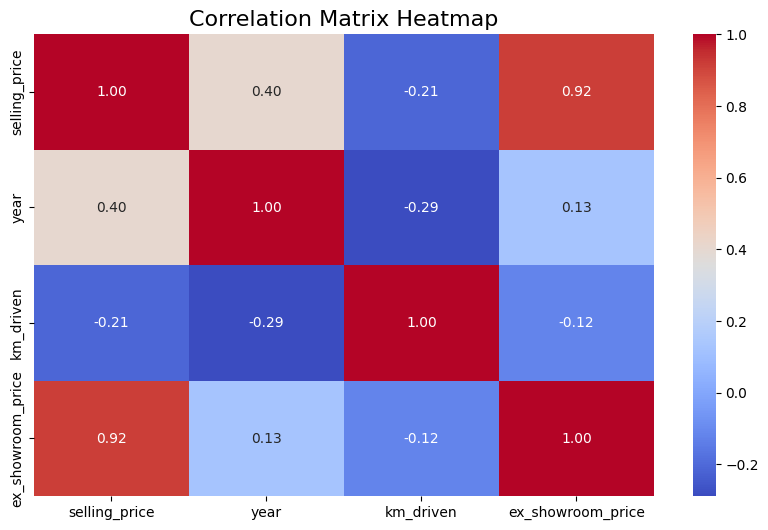

In [104]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))

sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()